In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('data/removed_outlier.csv').set_index('id')
df

,loan_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term_months
id,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,13.99,123.03,20.0,24.0,10.0,3.0,55000.0,0.0,...,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,36.0
68355089,24700.0,24700.0,11.99,820.28,20.0,21.0,10.0,3.0,65000.0,0.0,...,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,36.0
68476807,10400.0,10400.0,22.45,289.91,50.0,51.0,3.0,3.0,104433.0,2.0,...,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,60.0
68426831,11950.0,11950.0,13.44,405.18,20.0,23.0,4.0,4.0,34000.0,2.0,...,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,36.0
68476668,20000.0,20000.0,9.17,637.58,10.0,12.0,10.0,3.0,180000.0,0.0,...,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89905081,18000.0,18000.0,9.49,377.95,10.0,12.0,5.0,5.0,130000.0,0.0,...,0.0,100.0,33.3,0.0,0.0,275356.0,54349.0,13100.0,77756.0,60.0
88948836,29400.0,29400.0,13.99,683.94,20.0,23.0,9.0,3.0,180792.0,0.0,...,2.0,100.0,42.9,0.0,0.0,719056.0,148305.0,56500.0,95702.0,60.0
89996426,32000.0,32000.0,14.49,752.74,20.0,24.0,3.0,3.0,157000.0,2.0,...,2.0,100.0,0.0,0.0,0.0,524379.0,122872.0,15800.0,23879.0,60.0


In [2]:
df['loan_status'].value_counts() / df.shape[0] *100

1.0    79.894674
0.0    20.105326
Name: loan_status, dtype: float64

In [3]:
df['loan_status'].value_counts() 

1.0    987018
0.0    248381
Name: loan_status, dtype: int64

In [4]:
from sklearn.metrics import classification_report



def get_scores(model, X_train,y_train, X_test, y_test, save):
    # Make predictions on the training set
    sns.set(style="darkgrid")

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))  # 1 row, 2 columns

    y_pred = model.predict(X_train)

    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    print("- Train Accuracy:", accuracy)
    print("- Train Precision:", precision)
    print("- Train Recall:", recall)
    print("- Train F1 Score:", f1)
    
    #print(classification_report(y, y_pred))

    # Calculate confusion matrix
    cm1 = confusion_matrix(y_train, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax = axes[0])
    axes[0].set_title("Confusion Matrix - Train")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\n- Test Accuracy:", accuracy)
    print("- Test Precision:", precision)
    print("- Test Recall:", recall)
    print("- Test F1 Score:", f1)
    
    #print(classification_report(y, y_pred))

    # Calculate confusion matrix
    cm2 = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", ax = axes[1])
    axes[1].set_title("Confusion Matrix - Test")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    
    fig.savefig(save)
    plt.show()

# Imbalanced data

In [5]:
# Separate features (X) and labels (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Assuming X, y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

## Logistic Regression

- Train Accuracy: 0.7989515530916638
- Train Precision: 0.7989807875622081
- Train Recall: 0.9999366779211109
- Train F1 Score: 0.8882344073779916

- Test Accuracy: 0.798915331066861
- Test Precision: 0.7989605595492519
- Test Recall: 0.9999189479443172
- Test F1 Score: 0.8882149124780632


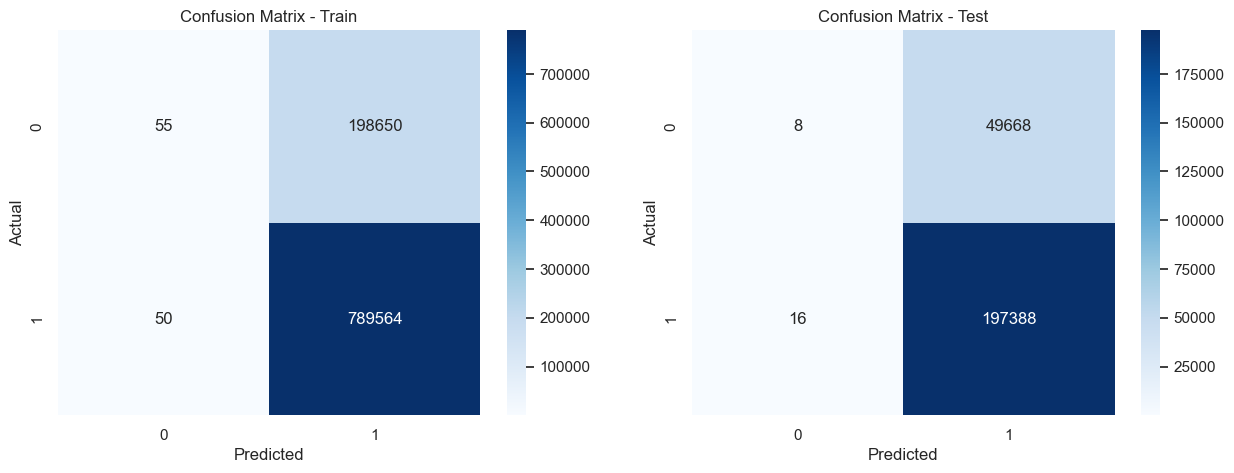

<Figure size 800x600 with 0 Axes>

In [6]:
from sklearn.linear_model import LogisticRegression

# Create an XGBoost classifier for binary classification
clf = LogisticRegression(C = 100,random_state = 42)

#Model training
clf.fit(X_train, y_train)

#getting scores
get_scores(clf, X_train, y_train, X_test, y_test,'figs/imb_logistic.png')



## DecisionTreeClassifier

- Train Accuracy: 0.8024817897864961
- Train Precision: 0.8087086135708536
- Train Recall: 0.9860058205654915
- Train F1 Score: 0.888599751532095

- Test Accuracy: 0.8002873563218391
- Test Precision: 0.8075477028278959
- Test Recall: 0.9847014244898786
- Test F1 Score: 0.8873692403557987


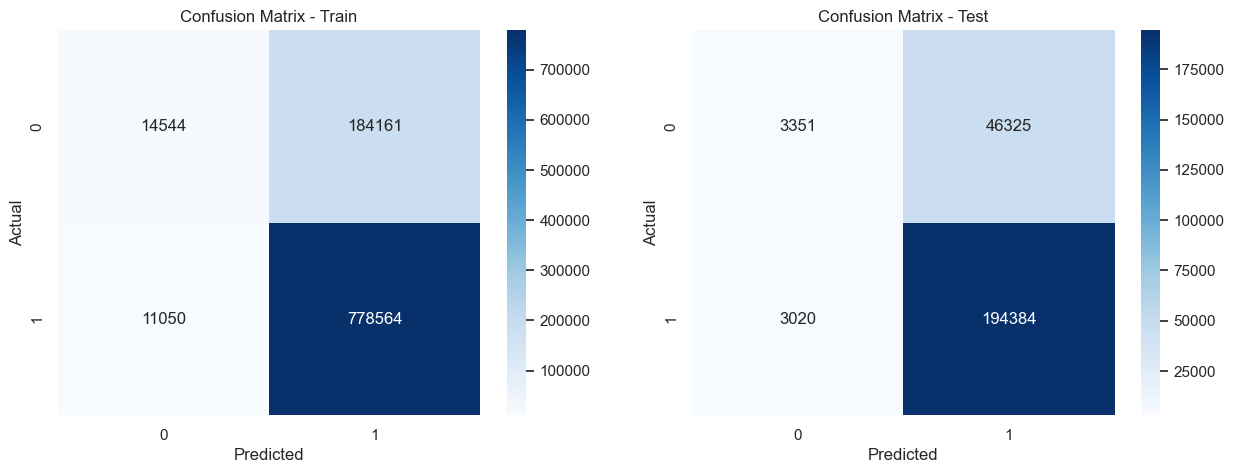

<Figure size 800x600 with 0 Axes>

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 9, random_state = 42)

#Model training
clf.fit(X_train, y_train)

get_scores(clf, X_train, y_train, X_test, y_test,'figs/imb_decision.png')


## Naive Bayes Classifier

- Train Accuracy: 0.6628851615723264
- Train Precision: 0.8681341370761034
- Train Recall: 0.6815798605394534
- Train F1 Score: 0.7636283146287424

- Test Accuracy: 0.6636150234741784
- Test Precision: 0.868820188460049
- Test Recall: 0.68192640473344
- Test F1 Score: 0.7641112094998069


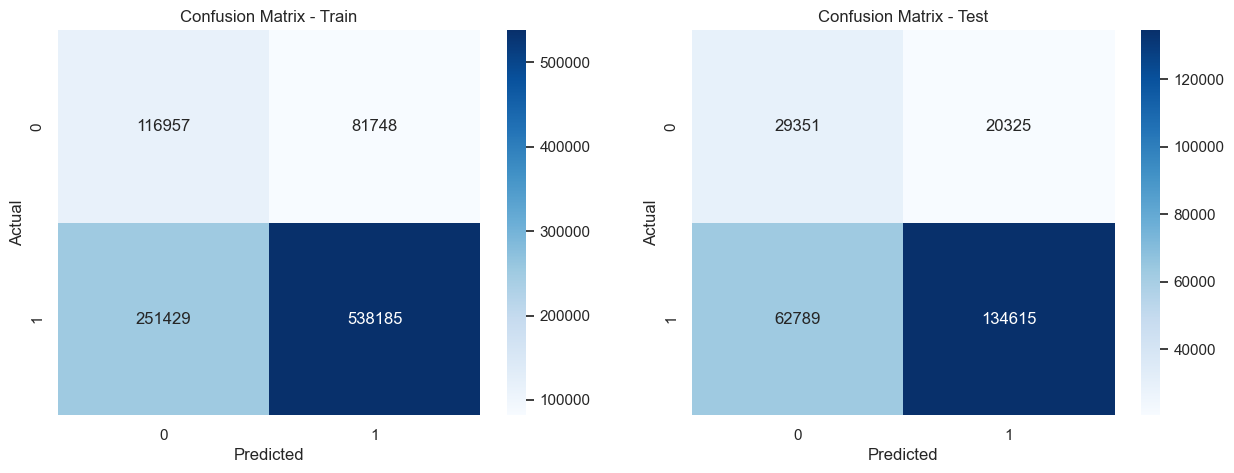

<Figure size 800x600 with 0 Axes>

In [8]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

#Model training
clf.fit(X_train, y_train)

get_scores(clf, X_train, y_train, X_test, y_test,'figs/imb_NB.png')


## XGBoost

- Train Accuracy: 0.9946211698854317
- Train Precision: 0.9934355229184177
- Train Recall: 0.9998746222837994
- Train F1 Score: 0.9966446723127398

- Test Accuracy: 0.7828598024931196
- Test Precision: 0.822132686765833
- Test Recall: 0.9292618184028693
- Test F1 Score: 0.8724208203438034


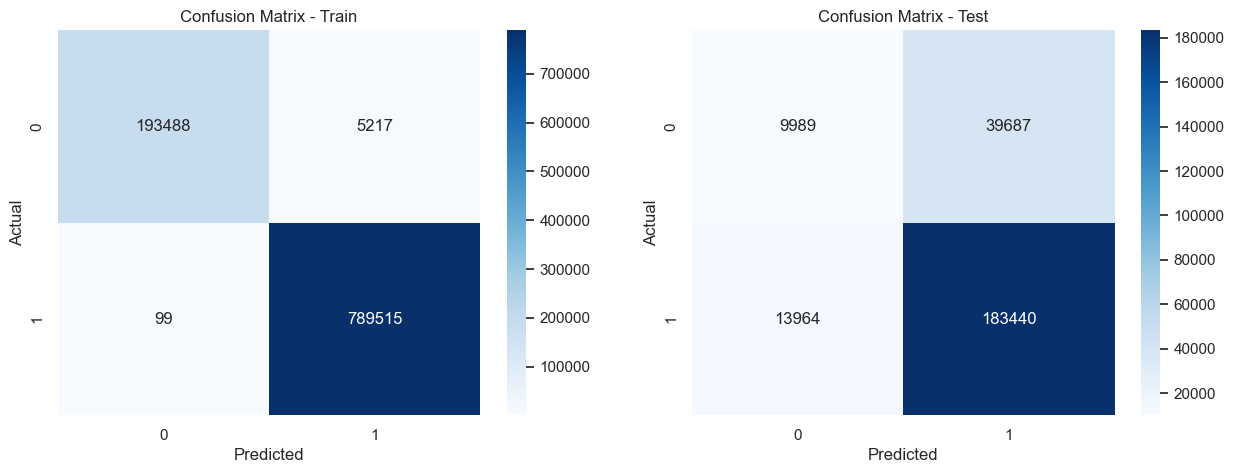

<Figure size 800x600 with 0 Axes>

In [9]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=1000, max_depth = 9, random_state = 42, objective='binary:logistic', learning_rate = 0.5)

#Model training
clf.fit(X_train, y_train)

get_scores(clf, X_train, y_train, X_test, y_test,'figs/imb_XGB.png')


# Undersampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and labels (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"- Class distribution before undersampling:\n{pd.Series(y_train).value_counts()}")

# Apply NearMiss to the training set
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

print(f"- Class distribution after undersampling:\n{pd.Series(y_train_resampled).value_counts()}")

- Class distribution before undersampling:
1.0    789812
0.0    198507
Name: loan_status, dtype: int64
- Class distribution after undersampling:
0.0    198507
1.0    198507
Name: loan_status, dtype: int64


## Logistic Regression

- Train Accuracy: 0.5938732639151264
- Train Precision: 0.6023013620418001
- Train Recall: 0.5526807618874902
- Train F1 Score: 0.5764251563074659

- Test Accuracy: 0.5711065242026874
- Test Precision: 0.856807640263123
- Test Recall: 0.5554699147084774
- Test F1 Score: 0.6739905554444633


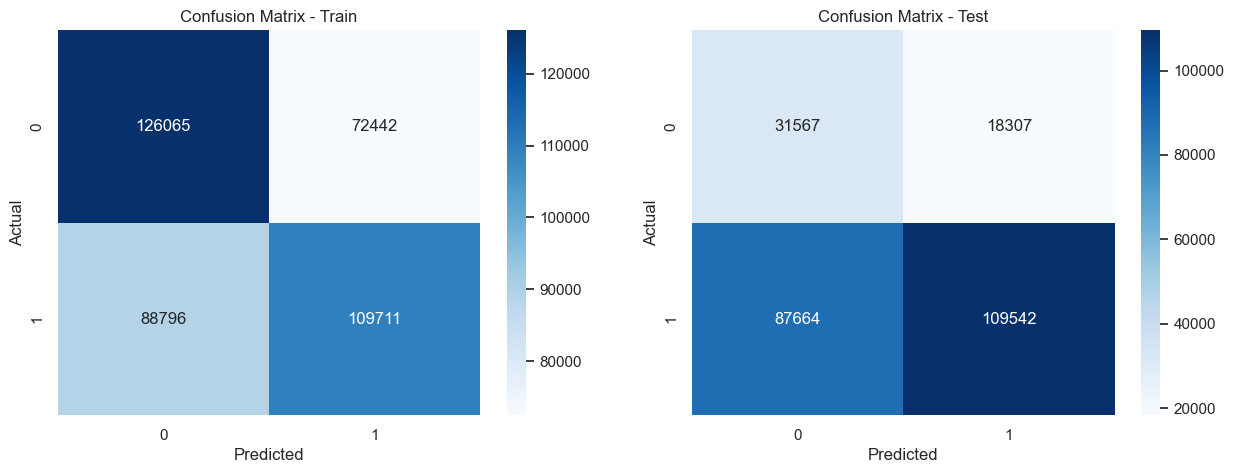

<Figure size 800x600 with 0 Axes>

In [11]:
# Create an XGBoost classifier for binary classification
clf = LogisticRegression(C = 100,random_state = 42)

#Model training
clf.fit(X_train_resampled, y_train_resampled)

get_scores(clf, X_train_resampled, y_train_resampled, X_test, y_test,'figs/under_logistic.png')


## DecisionTreeClassifier

- Train Accuracy: 0.6593722135743324
- Train Precision: 0.6663179421397667
- Train Recall: 0.6384913378369529
- Train F1 Score: 0.6521079223304966

- Test Accuracy: 0.6336854460093897
- Test Precision: 0.8821224688599036
- Test Recall: 0.6244941837469448
- Test F1 Score: 0.7312813783152277


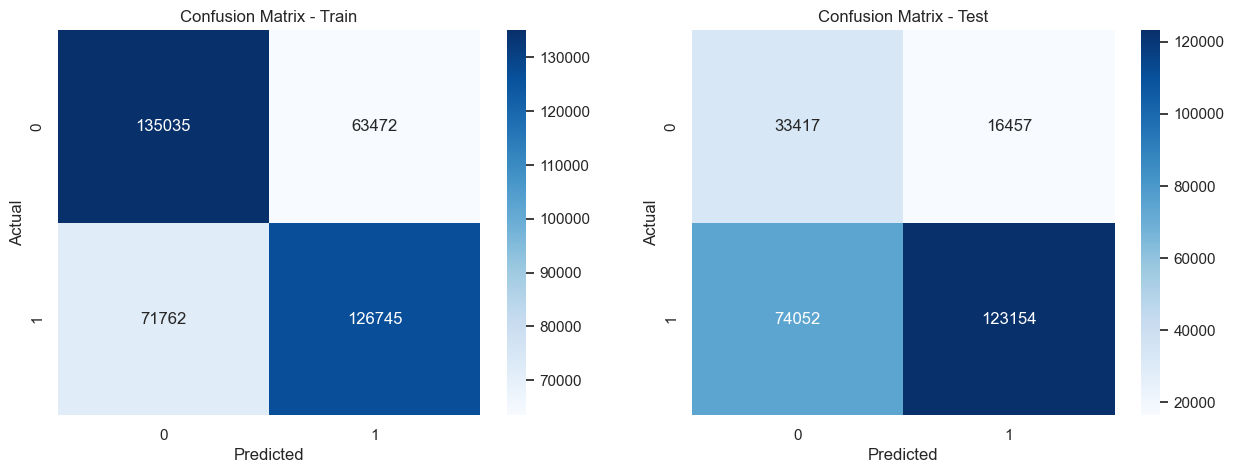

<Figure size 800x600 with 0 Axes>

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 9, random_state = 42)

#Model training
clf.fit(X_train_resampled, y_train_resampled)

get_scores(clf, X_train_resampled, y_train_resampled, X_test, y_test, 'figs/under_decision.png')


## Naive Bayes

- Train Accuracy: 0.6228571284639837
- Train Precision: 0.6651542649727767
- Train Recall: 0.4948037096928572
- Train F1 Score: 0.5674702101538239

- Test Accuracy: 0.5439695645135179
- Test Precision: 0.8873258797653959
- Test Recall: 0.49098404713852517
- Test F1 Score: 0.6321696493278404


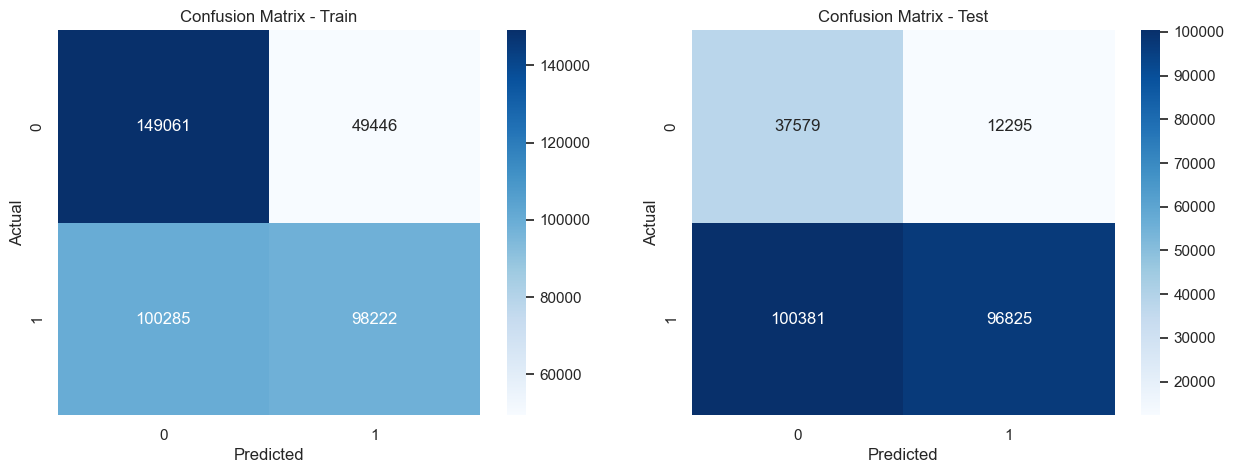

<Figure size 800x600 with 0 Axes>

In [13]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

#Model training
clf.fit(X_train_resampled, y_train_resampled)

get_scores(clf, X_train_resampled, y_train_resampled, X_test, y_test, 'figs/under_NB.png')


## XGBoost

- Train Accuracy: 1.0
- Train Precision: 1.0
- Train Recall: 1.0
- Train F1 Score: 1.0

- Test Accuracy: 0.6297474502185527
- Test Precision: 0.8737256620901263
- Test Recall: 0.6266797156273136
- Test F1 Score: 0.7298642854611814


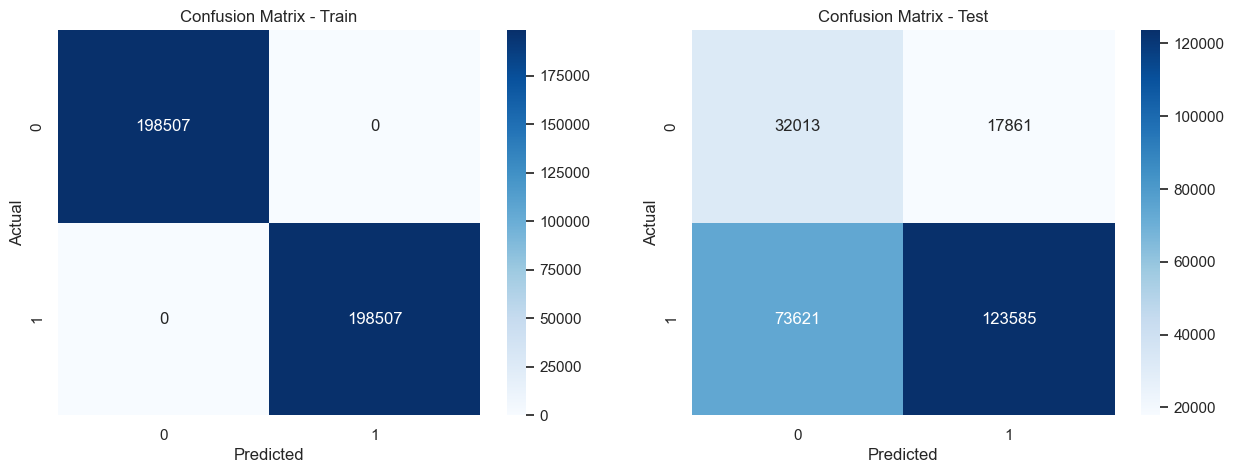

<Figure size 800x600 with 0 Axes>

In [14]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=1000, max_depth = 9, random_state = 42, objective='binary:logistic', learning_rate = 0.5)

#Model training
clf.fit(X_train_resampled, y_train_resampled)

get_scores(clf, X_train_resampled, y_train_resampled, X_test, y_test, 'figs/under_XGB.png')


# Over Sampling

In [15]:
from imblearn.over_sampling import SMOTE


# Separate features (X) and labels (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the class distribution before oversampling
print("Class distribution before oversampling:\n", pd.Series(y_train).value_counts())

# Apply SMOTE to the training set
oversampler = SMOTE(random_state=42, k_neighbors = 125, n_jobs = -1)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Print the class distribution after oversampling
print("Class distribution after oversampling:\n", pd.Series(y_train_resampled).value_counts())


Class distribution before oversampling:
 1.0    789812
0.0    198507
Name: loan_status, dtype: int64
Class distribution after oversampling:
 0.0    789812
1.0    789812
Name: loan_status, dtype: int64


## Logistic Regression

- Train Accuracy: 0.6019008320967522
- Train Precision: 0.6103078738571058
- Train Recall: 0.5637936622892536
- Train F1 Score: 0.5861293946607573

- Test Accuracy: 0.5777035777885705
- Test Precision: 0.8555621070687424
- Test Recall: 0.56654969929921
- Test F1 Score: 0.6816882502783752


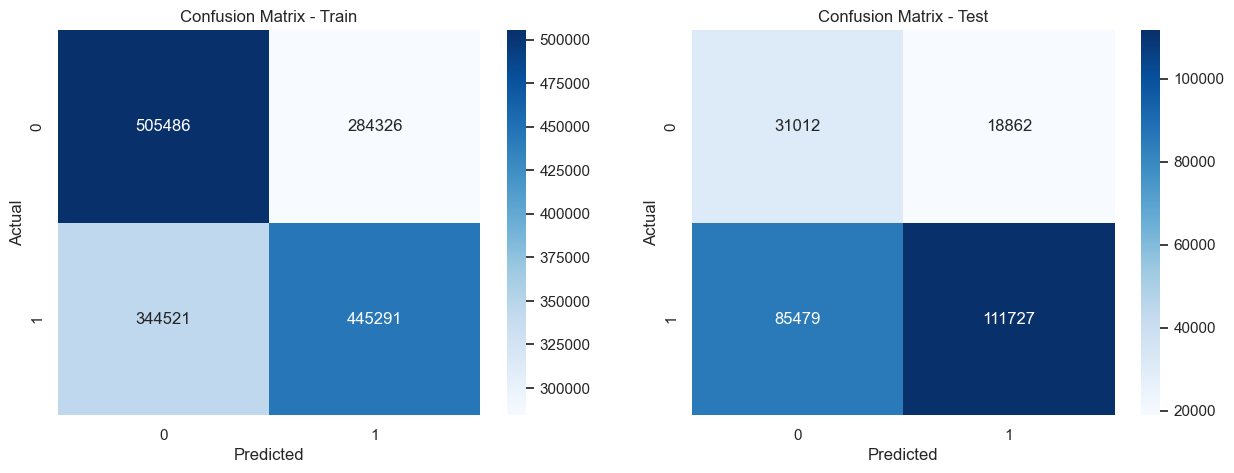

<Figure size 800x600 with 0 Axes>

In [16]:

clf = LogisticRegression(C = 100,random_state = 42)

#Model training
clf.fit(X_train_resampled, y_train_resampled)

get_scores(clf, X_train_resampled, y_train_resampled, X_test, y_test, 'figs/over_logistic.png')


## DecisionTreeClassifier

- Train Accuracy: 0.8396719725706877
- Train Precision: 0.7784169451420744
- Train Recall: 0.9496778980314302
- Train F1 Score: 0.8555611067006123

- Test Accuracy: 0.7902582159624413
- Test Precision: 0.8173234327322254
- Test Recall: 0.9494133038548523
- Test F1 Score: 0.8784305261997312


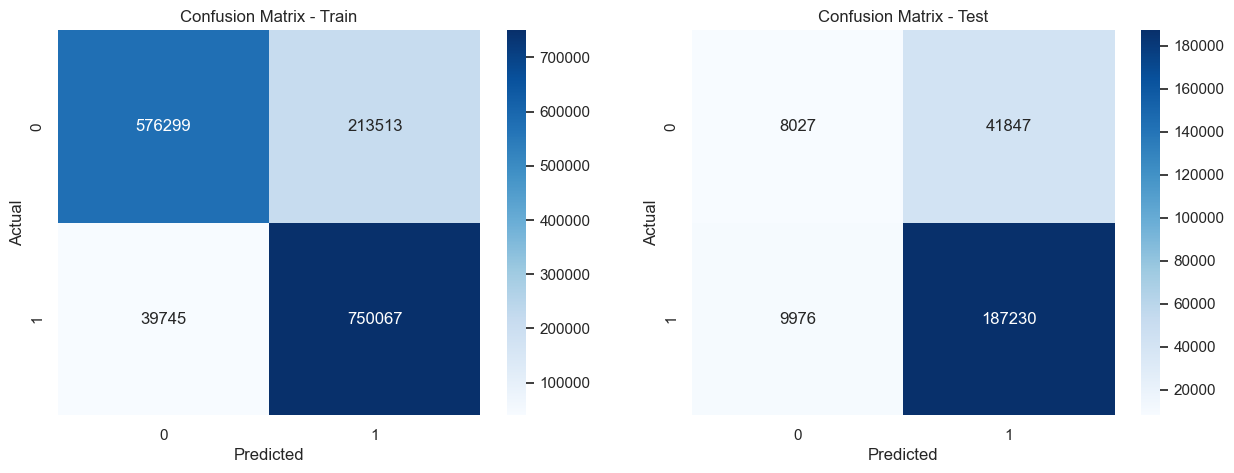

<Figure size 800x600 with 0 Axes>

In [17]:
clf = DecisionTreeClassifier(max_depth = 9, random_state = 42)

#Model training
clf.fit(X_train_resampled, y_train_resampled)

get_scores(clf, X_train_resampled, y_train_resampled, X_test, y_test, 'figs/over_decision.png')


## Naive Bayes

- Train Accuracy: 0.6197031698682725
- Train Precision: 0.7139950203712087
- Train Recall: 0.39938998141329835
- Train F1 Score: 0.5122441158416774

- Test Accuracy: 0.47864254492472075
- Test Precision: 0.885216352923947
- Test Recall: 0.3984564364167419
- Test F1 Score: 0.5495483839383438


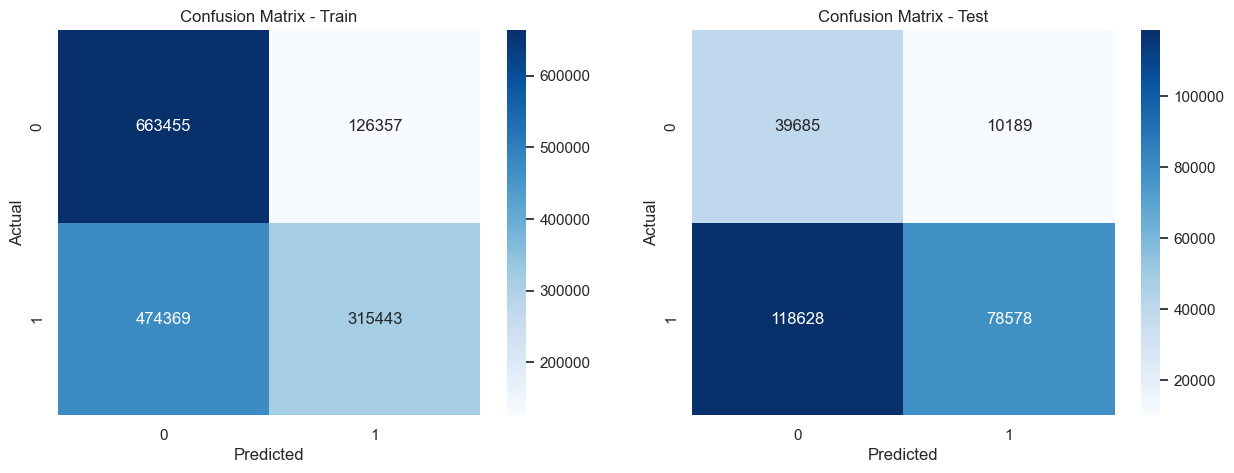

<Figure size 800x600 with 0 Axes>

In [18]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

#Model training
clf.fit(X_train_resampled, y_train_resampled)

get_scores(clf, X_train_resampled, y_train_resampled, X_test, y_test, 'figs/over_NB.png')


## XGBoost

- Train Accuracy: 0.9973025226256375
- Train Precision: 0.9947149858365147
- Train Recall: 0.9999177019341312
- Train F1 Score: 0.9973095586122854

- Test Accuracy: 0.7820665371539582
- Test Precision: 0.8213045017907651
- Test Recall: 0.929099520298571
- Test F1 Score: 0.8718828441927693


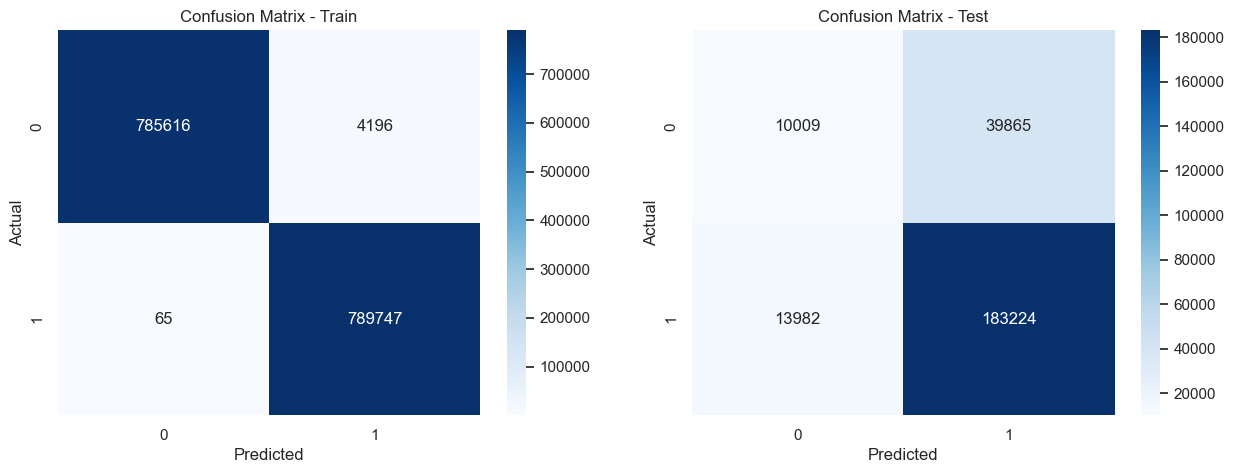

<Figure size 800x600 with 0 Axes>

In [19]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=1000, max_depth = 9, random_state = 42, objective='binary:logistic', learning_rate = 0.5)

#Model training
clf.fit(X_train_resampled, y_train_resampled)

get_scores(clf, X_train_resampled, y_train_resampled, X_test, y_test, 'figs/over_XGB.png')
